In [1]:
import torch

In [2]:
x = torch.empty(5,3)
print(x)

tensor([[9.2755e-39, 1.0561e-38, 1.0286e-38],
        [8.4490e-39, 1.0102e-38, 9.0919e-39],
        [1.0102e-38, 8.9082e-39, 8.4489e-39],
        [9.6429e-39, 8.4490e-39, 9.6429e-39],
        [9.2755e-39, 1.0286e-38, 9.0919e-39]])


In [3]:
#randomly initialized matrix
x = torch.rand(5,3)
print(x)

tensor([[0.7929, 0.4700, 0.3770],
        [0.8568, 0.7433, 0.4723],
        [0.2556, 0.1994, 0.9560],
        [0.4020, 0.0888, 0.2885],
        [0.7940, 0.2045, 0.6717]])


In [4]:
#construct a matrix filled wiht zeros with long datatype
x = torch.zeros(5,3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [5]:
#construct a tensor directyly from data
x = torch.tensor([5.5,3])
print(x)

tensor([5.5000, 3.0000])


In [6]:
#create tensor based on an existing tensor. These methods will reuse properties of the input tensor
# e.g dtype, unless new values are provided by user
x = x.new_ones(5,3,dtype = torch.double)  #new_* methods take in sizes
print(x)
x = torch.randn_like(x, dtype=torch.float)     #override dtype!
print(x)                                       # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.7176, -1.4418,  1.7376],
        [-1.1257,  0.5001,  1.4114],
        [-0.4501,  0.8548, -0.7822],
        [-2.0231,  0.7597,  0.5196],
        [-0.3426, -0.0926, -0.4599]])


In [7]:
print(x.size())

torch.Size([5, 3])



# Operations

In [8]:
y = torch.rand(5,3)
print(x+y)

tensor([[-0.2898, -1.4049,  2.5153],
        [-1.1159,  0.6482,  2.2011],
        [-0.3890,  1.5479, -0.1656],
        [-1.6322,  0.9263,  1.2204],
        [ 0.1749,  0.0200,  0.3289]])


In [9]:
print(torch.add(x,y))

tensor([[-0.2898, -1.4049,  2.5153],
        [-1.1159,  0.6482,  2.2011],
        [-0.3890,  1.5479, -0.1656],
        [-1.6322,  0.9263,  1.2204],
        [ 0.1749,  0.0200,  0.3289]])


In [10]:
result = torch.empty(5,3)
torch.add(x,y, out=result)
#print(result)   

tensor([[-0.2898, -1.4049,  2.5153],
        [-1.1159,  0.6482,  2.2011],
        [-0.3890,  1.5479, -0.1656],
        [-1.6322,  0.9263,  1.2204],
        [ 0.1749,  0.0200,  0.3289]])

In [11]:
#add x to y
y.add_(x)
print(y)

tensor([[-0.2898, -1.4049,  2.5153],
        [-1.1159,  0.6482,  2.2011],
        [-0.3890,  1.5479, -0.1656],
        [-1.6322,  0.9263,  1.2204],
        [ 0.1749,  0.0200,  0.3289]])


'''Any operation that mutates a tensor in-place is post-fixed with an _. For example: x.copy_(y), x.t_(), will change x.'''

In [12]:
x


tensor([[ 1.2886e+00,  3.5096e+00, -1.5340e+00],
        [ 6.5013e-04, -8.8368e-01, -1.7240e+00],
        [-8.8860e-01, -4.2763e-01, -1.7673e+00],
        [ 1.8660e+00, -2.9658e+00, -4.5787e-01],
        [ 6.1800e-01,  6.9440e-01, -1.9102e-01]])

In [13]:
print(x[:,1])
#print(x[1,:])



tensor([ 3.5096, -0.8837, -0.4276, -2.9658,  0.6944])


# torch.view
If there is any situation that you don't know how many rows you want but are sure of the number of columns, then you can specify this with a -1. (Note that you can extend this to tensors with more dimensions. Only one of the axis value can be -1). This is a way of telling the library: "give me a tensor that has these many columns and you compute the appropriate number of rows that is necessary to make this happen".

In [14]:
#Resizing/Reshaping the tensor
x = torch.randn(4,4)
print(x)
y = x.view(16)
z = x.view(-1,8)
y.size(),z

tensor([[ 1.2990e+00,  2.1880e+00,  1.7839e-01,  8.5589e-01],
        [-5.7073e-01,  2.9425e-01,  2.5970e+00, -7.0434e-01],
        [ 1.2879e-01, -1.2391e-03,  9.4784e-01, -1.5730e+00],
        [-6.4834e-01, -8.1280e-01,  8.1377e-01, -3.9267e-01]])


(torch.Size([16]),
 tensor([[ 1.2990e+00,  2.1880e+00,  1.7839e-01,  8.5589e-01, -5.7073e-01,
           2.9425e-01,  2.5970e+00, -7.0434e-01],
         [ 1.2879e-01, -1.2391e-03,  9.4784e-01, -1.5730e+00, -6.4834e-01,
          -8.1280e-01,  8.1377e-01, -3.9267e-01]]))

In [15]:
#if you have only one element tensor, use .item() to the value as python scalars
x = torch.randn(1)
print(x)
x.item()

tensor([-0.6926])


-0.6925826072692871

# converting a torch tensor to numpy

In [16]:
a = torch.ones(5)
print(a)


tensor([1., 1., 1., 1., 1.])


In [17]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [18]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [19]:
#Converting numpy array to torch tensor
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)
np.add(a,1,out=a)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


array([2., 2., 2., 2., 2.])

In [20]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!
else:
    print('NOPE')

NOPE


In [21]:
print('Aamir')

Aamir


# AUTOGRAD: AUTOMATIC DIFFERENTIATION
The autograd package provides automatic differentiation for all operation on Tensor. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

#Tensor
------
torch.Tensor is central class of the package.
If you set its attribute **.requires_grad()** as True, it starts to track all operation on it. When you finish your computtion you can call .backward() and have all the gradients computed automatically. The gradient for this tensor will be accumulated inot .grad attribute.

To stop a tensor from tracking history, you can call **detach()** to detach it from the computation history,
and to prevent future computation from being tracked.

To prevent tracking history(and using memory), you can also wrap the code block with **torch.no_grad()**: This can be particularly helpful when evaluating a model because the model may have trainaible parameters with requires_grad=True, but for which we don't need the gradients.

There is one more clas which is very important for aut0grad implementation a Function

Tensor and Function are interconnected and build up and acyclic graph, that encodes a complete history of computation. Each tensor has a **.grad_fn** attribute that references a Function that has created the Tensor.

If you want to compute the derivatives, you can call **.backward()** on a Tensor. If Tensor is scalar you don't need to specify any argumennts to backward(), however if it has more elements, you don't need to specify a gradient, but you need to speciy a gradient argument that is a tensor of matching shape.

In [22]:
x = torch.ones(2,2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [23]:
y = x+2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [24]:
print(x.grad_fn)
print(y.grad_fn)

None


In [25]:
z = y*y*3
out = z.mean()
print(z,out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [26]:
a = torch.randn(2,2)
a = ((a*3)/(a-1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a*a).sum()
print(b.grad_fn)

False
True


**Gradients**

Let’s backprop now. Because **out** contains a single scalar, **out.backward()** is equivalent to **out.backward(torch.tensor(1.))**.

In [27]:
out.backward()

**Print gradients d(out)/dx**

In [28]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [29]:
x = torch.randn(3,requires_grad=True)
y = x * 2
while y.data.norm()<1000:
    y=y*2
print(y)

tensor([  653.4516,   -56.6601, -1231.5581], grad_fn=<MulBackward0>)


You can also stop autograd from tracking history on Tensor with **.require_grad=True** either
by wrapping the code block in **with torch.no_grad()**:

In [30]:
print(x.requires_grad)
print((x**2).requires_grad)
with torch.no_grad():
    print((x**2).requires_grad)

True
True
False


Or by using **.detach()** to get new Tensor with some content but 
that does not require gradients 

In [34]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


In [35]:
import numpy as np

In [36]:
'''N is batch size; D_in is input dimension
H is hidden dimension; D_out is output dimension'''
N, D_in, H, D_out = 64, 1000, 100, 10

x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6

for t in range(500):
    h = x.dot(w1)
    h_relu = np.maximum(h,0)
    #print(h_relu)
    y_pred = h_relu.dot(w2)
    
    loss = np.square(y_pred - y).sum()
    print(t,loss)
    
    #Backprop to compute gradients of w1 and w2 with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    #update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    

0 28908520.949068658
1 23467604.360672787
2 24180917.356898397
3 27002666.35619718
4 28550498.96604411
5 25857656.98739277
6 19237609.258243036
7 11752405.832338084
8 6338364.31508195
9 3297303.9644351555
10 1821877.940887975
11 1122950.040700867
12 778875.7445060022
13 592255.93558374
14 478107.95307557227
15 399650.0609622641
16 340853.999475639
17 294273.50134341273
18 256055.60325623833
19 224053.8768121822
20 196932.41476286325
21 173753.88637135288
22 153835.66916082596
23 136607.1900396084
24 121657.15584547547
25 108619.8864984327
26 97210.87079362725
27 87206.31840261898
28 78402.41101166014
29 70627.45804304184
30 63747.25632857827
31 57638.514810671135
32 52204.18377443318
33 47363.419667075956
34 43037.30964485081
35 39165.51339254706
36 35694.79114108816
37 32572.775689395705
38 29762.548943030066
39 27229.1400082502
40 24942.82337302801
41 22872.852175284796
42 20996.880012215217
43 19294.605288538925
44 17748.64421685002
45 16341.976654786355
46 15061.15350928661
47 1389

390 0.00043783973665931545
391 0.00041900722799718254
392 0.00040098974735705876
393 0.0003837534015179692
394 0.0003672635550018819
395 0.0003514830412470171
396 0.0003363848693194841
397 0.00032193895590575735
398 0.0003081169395572833
399 0.00029489161575986045
400 0.0002822372642342181
401 0.00027012862822442453
402 0.00025854464950753167
403 0.0002474583728037605
404 0.00023685003471529453
405 0.0002266990829990971
406 0.00021698552300931245
407 0.0002076900656534485
408 0.00019879483482071605
409 0.00019028275795681613
410 0.00018213856623982495
411 0.00017434348005724716
412 0.00016688396507548675
413 0.00015974567033727704
414 0.0001529138939548298
415 0.00014637561630650276
416 0.00014011870794858477
417 0.00013413013894725257
418 0.0001283997824518895
419 0.00012291496195410414
420 0.0001176652815190489
421 0.0001126411408454205
422 0.00010783253720918066
423 0.00010323018417235174
424 9.882513644238665e-05
425 9.460902871447625e-05
426 9.057431480129766e-05
427 8.67121060134

In [37]:
t = torch.Tensor()

In [38]:
print(t.device)
print(t.dtype)
print(t.layout)

cpu
torch.float32
torch.strided


In [39]:
device = torch.device('cuda:0')
device

device(type='cuda', index=0)

In [40]:
data = np.array([1,2,3])
type(data)

numpy.ndarray

**Tensor** is class contructor

In [41]:
torch.Tensor(data)

tensor([1., 2., 3.])

    .tensor is factory function builds tensor object. functions accepts as parameter input and returns a particular type of object. Factory function is an OOP concept which help in creating object instead from the constructor.

In [42]:
torch.tensor(data)

tensor([1, 2, 3], dtype=torch.int32)

Returns Idnetity matrix

In [43]:
torch.eye(2)

tensor([[1., 0.],
        [0., 1.]])

In [44]:
t1 = torch.Tensor(data) #constructor
t2 = torch.tensor(data) #factory func
t3 = torch.as_tensor(data)#factory functions
t4 = torch.from_numpy(data)#factory func

In [45]:
 print(t1)
print(t2)
print(t3)
print(t4)

tensor([1., 2., 3.])
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3], dtype=torch.int32)


In [46]:
 print(t1.dtype)
print(t2.dtype)
print(t3.dtype)
print(t4.dtype)

torch.float32
torch.int32
torch.int32
torch.int32


In [47]:
#dtype() infer based on the incoming data

torch.get_default_dtype()

torch.float32

In [48]:
data = np.array([1,2,3])

In [49]:
t1 = torch.tensor(data)
t2 = torch.Tensor(data)
t3 = torch.as_tensor(data)#takes any arraya
t4 = torch.from_numpy(data)#in this case it only takes from numpy array

In [50]:
data[0]=0
data[1]=0
data[2]=0

In [51]:
print(t1)
print(t2)

tensor([1, 2, 3], dtype=torch.int32)
tensor([1., 2., 3.])


In [52]:
print(t3)
print(t4)

tensor([0, 0, 0], dtype=torch.int32)
tensor([0, 0, 0], dtype=torch.int32)


In **t1&t2** it cretes an additional copy where as in
case of **t3&t4** it shares a data in memory

# Tensor Operations
1. Reshaping operations
2. Element wise operation
3. Reduction operation
4. Access operations

In [28]:
t = torch.tensor([
    [1,1,1,1],
    [2,2,2,2],
    [3,3,3,3]
], dtype=torch.float32)

In [54]:
torch.tensor(t.shape).prod()

tensor(12)

In [55]:
t.numel()

12

In [56]:
t.reshape(1,12)


tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])

In [57]:
t.reshape(2,6)

tensor([[1., 1., 1., 1., 2., 2.],
        [2., 2., 3., 3., 3., 3.]])

In [58]:
t.reshape(3,4)

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])

In [59]:
t.reshape(4,3)

tensor([[1., 1., 1.],
        [1., 2., 2.],
        [2., 2., 3.],
        [3., 3., 3.]])

In [60]:
t.reshape(6,2)

tensor([[1., 1.],
        [1., 1.],
        [2., 2.],
        [2., 2.],
        [3., 3.],
        [3., 3.]])

In [61]:
t.reshape(12)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

In [29]:
t

tensor([[1., 1., 1., 1.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.]])

# squeeze & unsqueeze
Next way to change the shape is by **squezzing** and **unsquezing** them.

**Squeezing** a tensor removes all the axis that have a length of one while **unsqueezing** a tensor adds dimension with a length of one.

In [62]:
print(t.reshape(1,12).squeeze())

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])


In [63]:
print(t.reshape(1,12).squeeze().shape)

torch.Size([12])


In [64]:
print(t.reshape(1,12).squeeze().unsqueeze(dim=0))

tensor([[1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.]])


In [65]:
print(t.reshape(1,12).squeeze().unsqueeze(dim=0).shape)

torch.Size([1, 12])


Since input tensor can be of any shape we pass the **-1** of reshape function -1 tells to figure out what the value should be based on the other value and the number of the value contained within the tensor.

In [65]:
def flatten(t):
    t = t.reshape(1,-1)
    t = t.squeeze()
    return t

After squeezing the first axis is removed

In [66]:
flatten(t)

tensor([1., 1., 1., 1., 2., 2., 2., 2., 3., 3., 3., 3.])

## CNN Flatten operation Visualized - Tensor batch procession for Deep Learning

![](Pic.png)

In [69]:
t1 = torch.tensor([
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1],
    [1,1,1,1]

])

In [70]:
t2 = torch.tensor([
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2],
    [2,2,2,2]
])

In [71]:
t3 = torch.tensor([
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3],
    [3,3,3,3]
])

In [75]:
t = torch.stack((t1,t2,t3))
t.shape

torch.Size([3, 4, 4])

In [76]:
t  = t.reshape(3,1,4,4)

In [77]:
t

tensor([[[[1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1],
          [1, 1, 1, 1]]],


        [[[2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2],
          [2, 2, 2, 2]]],


        [[[3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3],
          [3, 3, 3, 3]]]])

In [78]:
t.reshape(1,-1)[0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [79]:
t.reshape(-1)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [80]:
t.view(t.numel())

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [81]:
t.flatten()

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [85]:
t.flatten(start_dim=1).shape

torch.Size([3, 16])

In [86]:
t.flatten(start_dim =1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

In [89]:
t.reshape(3,-1)

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]])

# Broadcasting

In [90]:
t = torch.tensor([
    [1,2],
    [3,4]
])

In [93]:
np.broadcast_todcast_to(2,t.shape)

array([[2, 2],
       [2, 2]])

In [95]:
t + 2

tensor([[3, 4],
        [5, 6]])

In [97]:
t + torch.tensor(
    np.broadcast_to(2,t.shape), dtype=torch.float32)

tensor([[3., 4.],
        [5., 6.]])

In [103]:
t1 = torch.tensor([
    [1,2],
    [2,3]

    ],dtype=torch.float32
)
t2 = torch.tensor([2,4], dtype=torch.float32)

In [105]:
#t1+t2

In [106]:
t1.shape

torch.Size([2, 2])

In [107]:
t2.shape

torch.Size([2])

even though they have different dimension the elment wise opearion
is possible. And braodcasting is what makes it possible.
Lower rank **t2** transform into the higher rank tensor **t1** via broadcasting.

In [108]:
np.broadcast_to(t2.numpy(), t1.shape)

array([[2., 4.],
       [2., 4.]], dtype=float32)

In [109]:
t1 + t2

tensor([[3., 6.],
        [4., 7.]])

In [122]:
t = torch.tensor([
    [0,6,8],
    [8,9,7],
    [1,5,3]
],dtype=torch.float32)

In [121]:
t.eq(0)

tensor([[ True, False, False],
        [False, False, False],
        [False, False, False]])

In [113]:
t.ge(0)

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [115]:
t.gt(2)

tensor([[False,  True,  True],
        [ True,  True,  True],
        [False,  True,  True]])

In [116]:
t.lt(2)

tensor([[ True, False, False],
        [False, False, False],
        [ True, False, False]])

In [118]:
t.le(3)

tensor([[ True, False, False],
        [False, False, False],
        [ True, False,  True]])

In [124]:
#It can also be written as

t <= torch.tensor([
    np.broadcast_to(3,t.shape)
],dtype=torch.float32
)

tensor([[[ True, False, False],
         [False, False, False],
         [ True, False,  True]]])

In [125]:
t.abs()

tensor([[0., 6., 8.],
        [8., 9., 7.],
        [1., 5., 3.]])

In [126]:
t.sqrt()

tensor([[0.0000, 2.4495, 2.8284],
        [2.8284, 3.0000, 2.6458],
        [1.0000, 2.2361, 1.7321]])

In [127]:
t.neg()

tensor([[-0., -6., -8.],
        [-8., -9., -7.],
        [-1., -5., -3.]])

In [128]:
t.neg().abs()

tensor([[0., 6., 8.],
        [8., 9., 7.],
        [1., 5., 3.]])

# Tensor reduction operation
A reduction operation on a tensor is an operation 
that reduces the number of elements contained within
the tensor.

In [129]:
t = torch.tensor([
    [5,5,7],
    [5,6,9],
    [2,5,3]
],dtype=torch.float32)

In [130]:
t.sum()

tensor(47.)

In [131]:
t.numel()

9

In [133]:
t.sum().numel()

1

This all are reduction operations

In [134]:
t.prod()

tensor(1417500.)

In [135]:
t.mean()

tensor(5.2222)

In [136]:
t.prod()

tensor(1417500.)

In [137]:
t.std()

tensor(2.0480)

In [143]:
t = torch.randn(3,4)

In [144]:
t

tensor([[ 0.7120,  0.3667, -1.0627,  0.6710],
        [-0.9820, -1.2950,  1.8561, -0.9613],
        [-0.2291, -0.3647, -0.6109, -1.3317]])

In [147]:
t.sum(dim=0)

tensor([-0.4991, -1.2930,  0.1825, -1.6220])

In [150]:
t.prod(dim=0)

tensor([0.1602, 0.1732, 1.2050, 0.8590])

In [158]:
t.prod(dim=0)

tensor([0.1602, 0.1732, 1.2050, 0.8590])

In [159]:
t[0].sum()

tensor(0.6871)

In [160]:
t[1].sum()

tensor(-1.3821)

In [161]:
t[2].sum()

tensor(-2.5364)

In [165]:
t.sum(dim=1)

tensor([ 0.6871, -1.3821, -2.5364])

In [166]:
t.max()

tensor(1.8561)

In [169]:
#Returns the position of a flatten tensor
t.argmax()

tensor(6)

In [170]:
t.flatten()

tensor([ 0.7120,  0.3667, -1.0627,  0.6710, -0.9820, -1.2950,  1.8561, -0.9613,
        -0.2291, -0.3647, -0.6109, -1.3317])

In [171]:
t.max(dim=0)

torch.return_types.max(
values=tensor([0.7120, 0.3667, 1.8561, 0.6710]),
indices=tensor([0, 0, 1, 0]))

In [172]:
t.argmax(dim=0)

tensor([0, 0, 1, 0])

In [173]:
t.max(dim=1)

torch.return_types.max(
values=tensor([ 0.7120,  1.8561, -0.2291]),
indices=tensor([0, 2, 0]))

In [174]:
t.argmax(dim=1)

tensor([0, 2, 0])

In [175]:
t = torch.tensor([
    [1,2,3],
    [4,5,6],
    [7,8,9]
],dtype=torch.float32)

In [176]:
t.mean()

tensor(5.)

In [177]:
t.mean().item()

5.0

In [178]:
t.mean(dim=0).tolist()

[4.0, 5.0, 6.0]

In [180]:
t.mean(dim=0).numpy()

array([4., 5., 6.], dtype=float32)

In [17]:
total_correct/len(train_set)

0.8782833333333333

In [79]:
len(train_set)

60000

In [80]:
#No of labels(class name) in the tensor
train_set.train_labels

C:\Users\pc\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [81]:
#frequencey distribution of each class.
train_set.train_labels.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [82]:
'''iter creates an iterable object with next 
function python gets the next data element.'''
sample = next(iter(train_set))

In [83]:
len(sample)

2

In [84]:
type(sample)

tuple

In [85]:
image, label = sample

In [86]:
image.shape

torch.Size([1, 28, 28])

In [87]:
image.squeeze()
image.shape

torch.Size([1, 28, 28])

In [88]:
torch.tensor(label).shape

torch.Size([])

In [9]:
plt.imshow(image.squeeze(),cmap='gray')
print('label',label)

NameError: name 'image' is not defined

In [90]:
batch = next(iter(train_loader))

In [91]:
len(batch)

2

In [92]:
type(batch)

list

In [93]:
images, labels = batch

This means that we have 10 images 1 color channel with 28*28 size.

In [94]:
images.shape

torch.Size([100, 1, 28, 28])

Class label 1 for each of 10 images

In [95]:
labels.shape

torch.Size([100])

Plotting the whole batch of images at once using the **torchvision**
**make_grid** utility function <br>
**torchvision.utils.make_grid()**<br>
The reason for using plt.imshow(np.transpose(grid, (1,2,0))):
For a colored image... plt.imshow takes image dimension in following form [height width channels] ...while pytorch follows [channels height width]... so for compatibility we have to change pytorch dimensions so that channels appear at end... the standard representation of array is [axis0 axis1 axis2].... so we have to convert (0,1,2) to (1,2,0) form to make it compatible for imshow....

In [2]:
grid = torchvision.utils.make_grid(images, nrow=10) #no of images in a row

plt.figure(figsize=(20,20))
plt.imshow(np.transpose(grid,(1,2,0)))
print('labels',labels)

NameError: name 'torchvision' is not defined

In [97]:
class Network:
    def __init__(self):
        self.layer = None
    def forward(self,t):
        t = self.layer(t)

For more detail knowledge about this code 
click this link https://deeplizard.com/learn/video/MasG7tZj-hw

In [56]:
network.conv1.weight.shape

torch.Size([6, 1, 5, 5])

The first axis is number of filter, whereas 2nd axis is<br>
depth or channels while remaining two axis is height and width of the filters.

In [99]:
network = Network()

In [58]:
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [59]:
network.conv1.weight

Parameter containing:
tensor([[[[ 3.4887e-02, -3.0878e-02,  5.1553e-02,  2.7052e-03,  1.4350e-01],
          [ 1.3531e-01, -1.4501e-01,  5.0909e-02, -4.1123e-02,  1.9747e-01],
          [ 1.7528e-03,  1.5012e-01,  1.1205e-01,  1.5753e-01,  8.1572e-02],
          [ 1.2380e-01,  5.5811e-02,  1.1895e-01,  2.6236e-02,  6.6441e-03],
          [ 1.0526e-01,  5.2157e-02, -6.6079e-02, -4.6008e-02, -1.7273e-02]]],


        [[[ 1.4764e-01, -1.4205e-01, -1.6880e-01, -1.0852e-01,  7.7081e-02],
          [ 3.7139e-02, -1.4303e-01,  3.1370e-03,  1.7008e-01,  7.4001e-02],
          [-1.9204e-01,  8.9254e-02,  1.8077e-01, -1.4127e-01, -1.8067e-01],
          [-1.8165e-03, -9.9272e-02, -1.7565e-01,  7.3230e-02,  2.5156e-02],
          [-1.2152e-01,  1.5556e-01, -6.3379e-02, -6.6295e-02, -1.4986e-01]]],


        [[[-1.3127e-02,  2.2531e-03, -1.7851e-01,  4.9535e-02, -1.0665e-01],
          [ 8.2430e-02, -1.0046e-01, -1.2062e-01, -1.0744e-01, -6.0848e-03],
          [-4.3746e-02, -7.5312e-02,  9.2755e-

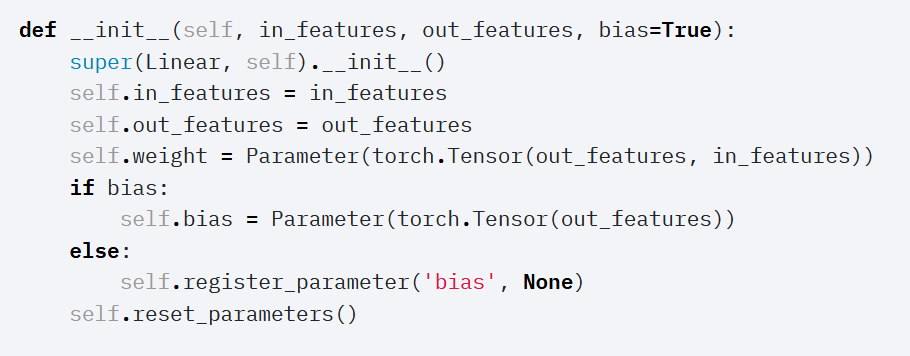

In [61]:
network = Network()

In [62]:
image.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [63]:
pred = network(image.unsqueeze(0))

In [64]:
pred.shape

torch.Size([1, 10])

In [65]:
pred

tensor([[ 0.0199, -0.0600,  0.0178,  0.0342,  0.0199,  0.0074,  0.0957,  0.0454,  0.0774,  0.0773]])

In [66]:
label

9

In [67]:
pred.argmax(dim=1)

tensor([6])

# With Batch

In [68]:
preds = network(images)

In [69]:
preds.shape

torch.Size([10, 10])

In [70]:
preds

tensor([[ 0.0199, -0.0600,  0.0178,  0.0342,  0.0199,  0.0074,  0.0957,  0.0454,  0.0774,  0.0773],
        [ 0.0173, -0.0610,  0.0199,  0.0422,  0.0199,  0.0120,  0.0979,  0.0445,  0.0834,  0.0714],
        [ 0.0247, -0.0553,  0.0235,  0.0434,  0.0180,  0.0151,  0.1002,  0.0412,  0.0875,  0.0657],
        [ 0.0212, -0.0555,  0.0222,  0.0429,  0.0194,  0.0131,  0.0981,  0.0431,  0.0867,  0.0695],
        [ 0.0185, -0.0631,  0.0224,  0.0398,  0.0197,  0.0070,  0.0954,  0.0434,  0.0755,  0.0799],
        [ 0.0225, -0.0621,  0.0233,  0.0359,  0.0187,  0.0090,  0.1021,  0.0469,  0.0811,  0.0740],
        [ 0.0202, -0.0595,  0.0142,  0.0408,  0.0249,  0.0073,  0.1023,  0.0462,  0.0853,  0.0739],
        [ 0.0199, -0.0582,  0.0255,  0.0397,  0.0194,  0.0133,  0.0969,  0.0474,  0.0849,  0.0710],
        [ 0.0249, -0.0504,  0.0233,  0.0478,  0.0173,  0.0182,  0.0982,  0.0415,  0.0886,  0.0638],
        [ 0.0179, -0.0626,  0.0210,  0.0426,  0.0194,  0.0156,  0.0923,  0.0419,  0.0886,  0.0695]])

In [71]:
preds.argmax(dim=1)

tensor([6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [72]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [73]:
preds.argmax(dim=1).eq(labels)

tensor([False, False, False, False, False, False, False, False, False, False])

In [9]:
def get_num_correct(preds,labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [10]:
get_num_correct(preds,labels)

15

# Training process
1. Get batch from training set.
2. Pass batch to network
3. Calculate the loss (difference between the predicted values and true values.)
4. Calculate the gradient of loss function w.r.t the network weights.
5. Update the weights using the gradients to reduce the loss.
6. Repeat steps 1-5 until one epoch is completed.
7. Repeat until 1-6 until you reach a desired accuracy.

In [100]:
network = Network()

In [101]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
batch = next(iter(train_loader))
images, label = batch

# calculating the loss

In [102]:
preds = network(images)

In [103]:
loss = F.cross_entropy(preds,labels) #calculate the loss
loss.item() #A tensor will be returned so we call .item() to get the number from loss function

2.3108673095703125

# calculating the gradients

In [105]:
#only checking gradient on conv1 layer
print(network.conv1.weight.grad)

None


In [107]:
loss.backward() #calculating the gradients

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [108]:
network.conv1.weight.grad.shape

torch.Size([6, 1, 5, 5])

# CNN project on Fashion MNIST data set

**torchvison** for image processing
**torchvision.transforms** for image transformation. It's a part of data agumentation
given an image we rotate right, left, up, down. To bale to see all the possible permuations.

In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim


import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120) # set number of outputlines
torch.set_grad_enabled(True)


In [4]:
class Network(nn.Module):
    def __init__(self):
        super(Network,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12*4*4, out_features =120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features =60, out_features=10)
        
    def forward(self,t):
        # (1) Inpute layer
        t = t
        
        #2 hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #3 hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        #4 hidden linear layer
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        
        #5 hindden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        #6 Output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

We need to load dataset to run the operations on it.<br>
For this PyTorch provides two classes:<br>
**torch.utils.Dataset**    -> An abstrach class for representing a dataset<br>
**torch.utils.DataLoader** -> Wraps a dataset and provide access to underlying data.<br>
An abstract class is a Python class that has methods we must implement, so we <br>
can create custom dataset by creating a subclass that extends the functionality<br>
of the Dataset class

# Initialize our training set

In [5]:
train_set = torchvision.datasets.FashionMNIST(
    root = '.data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    
)

# Training with a single batch 

In [6]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) #get batch
images, labels = batch

preds = network(images) #pass batch
loss = F.cross_entropy(preds,labels) #calclualte loss

loss.backward() #calculate gradient
optimizer.step() #update weights

print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds,labels)
print('loss2:', loss.item())

loss1: 2.303549289703369
loss2: 2.272326707839966


In [7]:
def get_num_correct(preds,labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

# Training with all batches

In [8]:
network = Network()

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr = 0.01)

for epoch in range(5):
    total_loss = 0
    total_correct = 0

    for batch in train_loader:   #Get batch
        images, labels = batch

        preds = network(images)
        loss = F.cross_entropy(preds,labels)

        '''each time when we compute the gradeint it will
        add gradient to previous one. We don't need that 
        therefore we use optimizer.zero_grad() to zero out all gradients 
        from the layers'''
        optimizer.zero_grad()
        loss.backward()  #Calculate gradients (back propagation)
        '''The gradients are "stored" by the tensors themselves 
        (they have a grad and a requires_grad attributes)
        once you call backward() on the loss.
        After computing the gradients for all tensors in the model,
        calling optimizer.step() makes the optimizer 
        iterate over all parameters (tensors) it is supposed to update
        and use their internally stored grad to update their values.'''
        
        '''1. optimizer.step is performs a parameter update based on the current gradient
        (stored in .grad attribute of a parameter) and the update rule.
        2. Calling .backward() mutiple times accumulates the gradient (by addition) for each parameter.
        This is why you should call optimizer.zero_grad() after each .step() call.
        Note that following the first .backward call,
        a second call is only possible after you have performed another forward pass.
        '''
        optimizer.step() #update weights (Gradient descent)

        total_loss += loss.item()
        total_correct += get_num_correct(preds,labels)


    print('epoch:',epoch, 'total_correct:', total_correct, 'loss:', total_loss)   
    
    

epoch: 0 total_correct: 45872 loss: 367.1552710235119
epoch: 1 total_correct: 50879 loss: 246.03516413271427
epoch: 2 total_correct: 51896 loss: 221.06047740578651
epoch: 3 total_correct: 52122 loss: 211.60301105678082
epoch: 4 total_correct: 52159 loss: 211.0542204529047


# Analyzing CNN results -- Builduing and Plotting a Confusion Matrix

In [10]:
len(train_set)

60000

In [12]:
len(train_set.targets)

60000

# Getting predictions for the training set

In [13]:
def get_all_preds(model,loader):
    #creating an empty tensor
    all_preds = torch.tensor([])
    '''we cannot give all the data, we need to give in batch so that
    it is computer efficient'''
    for batch in loader:
        #here we are unpacking the batch in images and correspondin labels
        
        images,labels = batch
        
        preds = model(images)
        #we are concatening the predictions to all_preds
        all_preds = torch.cat((all_preds, preds),dim=0)
    return all_preds
        
        
        

In [14]:
#bath size can vary the power of ur computer
prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=500)
'''give the network in prediciton method with prediction loader at the end
it will give all the prediction sample in our training set
the output is a tensor(train_preds)'''
train_preds = get_all_preds(network, prediction_loader)




In [15]:
train_preds.shape

torch.Size([60000, 10])

In [16]:
 print(train_preds.requires_grad)

True


In [17]:
train_preds.grad

In [21]:
train_preds.grad_fn

In [23]:
'''we have seen earlier that requires grad keeps the track of gradient
but here we dont wanna do that without keeping the requires_grad = True'''
#as simple as sound with torch no grads do these computations

with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=500)
    train_preds = get_all_preds(network,prediction_loader)
    
'''computationally its efficient and faster since it doesnt keep track of the graph'''




In [24]:
print(train_preds.requires_grad)

False


In [25]:
train_preds.grad

In [26]:
train_preds.grad_fn

In [27]:
preds_correct = get_num_correct(train_preds,train_set.targets)
print('total correct', preds_correct)
print('accuracy', preds_correct/len(train_set))

total correct 51607
accuracy 0.8601166666666666


# now we are ready to build confusion matrix

In [47]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [59]:
train_preds.argmax(axis=1)


tensor([9, 0, 3,  ..., 3, 0, 5])

In [63]:
stacked = torch.stack(
    (
    train_set.targets
    ,train_preds.argmax(dim=1)
    )
    ,dim=1
)

In [65]:
stacked.shape

torch.Size([60000, 2])

In [66]:
stacked

tensor([[9, 9],
        [0, 0],
        [0, 3],
        ...,
        [3, 3],
        [0, 0],
        [5, 5]])

In [67]:
stacked[0].tolist()

[9, 9]

In [69]:
#we are creating (10,10) confusion matrix because we have 10 categories
cmt = torch.zeros(10,10, dtype=torch.int32)

In [72]:
for p in stacked:
    tl,pl = p.tolist()
    cmt[tl,pl] = cmt[tl,pl] + 1 #count the occurences of corresponding categories
    #tl = true label
    #pl = predicted label

In [73]:
cmt

tensor([[5279,    0,   94,  180,   16,    9,  388,    1,   33,    0],
        [  54, 5733,   11,  122,    9,    2,   58,    0,   11,    0],
        [  68,    2, 3545,   83, 1707,    5,  550,    2,   38,    0],
        [ 226,   22,   16, 5494,   73,    8,  145,    0,   16,    0],
        [   7,    5,  101,  432, 4980,    3,  433,    1,   38,    0],
        [   1,    0,    0,    0,    0, 5843,    0,   99,   14,   43],
        [1146,    2,  377,  202,  590,    0, 3612,    2,   69,    0],
        [   1,    0,    0,    0,    0,  166,    1, 5723,   41,   68],
        [  15,    1,   17,   27,   21,   28,   77,    6, 5808,    0],
        [   0,    0,    1,    0,    0,   43,    0,  325,   41, 5590]], dtype=torch.int32)

# plotting confusion matrix

In [79]:


import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [82]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
#from resources.plotcm import plot_confusion_matrix

In [83]:
cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
cm

array([[5279,    0,   94,  180,   16,    9,  388,    1,   33,    0],
       [  54, 5733,   11,  122,    9,    2,   58,    0,   11,    0],
       [  68,    2, 3545,   83, 1707,    5,  550,    2,   38,    0],
       [ 226,   22,   16, 5494,   73,    8,  145,    0,   16,    0],
       [   7,    5,  101,  432, 4980,    3,  433,    1,   38,    0],
       [   1,    0,    0,    0,    0, 5843,    0,   99,   14,   43],
       [1146,    2,  377,  202,  590,    0, 3612,    2,   69,    0],
       [   1,    0,    0,    0,    0,  166,    1, 5723,   41,   68],
       [  15,    1,   17,   27,   21,   28,   77,    6, 5808,    0],
       [   0,    0,    1,    0,    0,   43,    0,  325,   41, 5590]],
      dtype=int64)

# Stack vs concat

In [1]:
import torch


In [20]:
t1 = torch.tensor([1,2,3])
t2 = torch.tensor([2,3,4])
t3 = torch.tensor([5,6,7])

In [17]:
t1.unsqueeze(dim=0)

tensor([[1, 2, 3]])

**Concatening** joins sequence of tensors along an existing axis,<br>
and **Stacking** joins sequence of tensors along new axis

In [18]:
t1.unsqueeze(dim=1)

tensor([[1],
        [2],
        [3]])

In [21]:
torch.cat(
    (t1,t2,t3)
    ,dim=0
)

tensor([1, 2, 3, 2, 3, 4, 5, 6, 7])

In [22]:
torch.stack(
    (t1,t2,t3)
    ,dim=0
)

tensor([[1, 2, 3],
        [2, 3, 4],
        [5, 6, 7]])

In [25]:
torch.cat(
    (
    t1.unsqueeze(0)
    ,t2.unsqueeze(0)
    ,t3.unsqueeze(0)
    )
    ,dim=0
)

tensor([[1, 2, 3],
        [2, 3, 4],
        [5, 6, 7]])

In [26]:
torch.stack(
    (
    t1.unsqueeze(1)
    ,t2.unsqueeze(1)
    ,t3.unsqueeze(1)
    )
    ,dim =1
)

tensor([[[1],
         [2],
         [5]],

        [[2],
         [3],
         [6]],

        [[3],
         [4],
         [7]]])